# **Initialization**

Notebook for the Asynchronous Advantage Actor-Critic (A3C) assignment in the deep learning course 02456 at DTU.

In [1]:
# Imports
import os, shutil
download_from_github = False
if os.path.exists('a3c'):
    shutil.rmtree('a3c')
if download_from_github:
    # If notebook is used in colab it needs to clone the repo
    !git clone https://github.com/Christianfrausing/a3c.git 'a3c'
    import a3c.bin as a3c
else:
    import bin as a3c

In [2]:
import torch

# Variables
worker_amount = 4
validate = True      # Apply an extra worker for validation
gpu = False
save_model = True
save_plot = True
seed = 0
a3c.utils.seed(seed)

# **Cartpole environment**

This code creates an A3C which solves the cartpole environment defined in the Open AI gym module. The results produced is used in the report.

Controller running on CPU

Elapsed      | Progress [%]      | Training      | Validation     
__________________________________________________________________
0:00:02      | 4                 | 38.75         | 31.0           
0:00:04      | 19                | 49.25         | 50.0           
0:00:06      | 32                | 47.0          | 31.0           
0:00:08      | 45                | 47.5          | 49.0           
0:00:10      | 57                | 49.25         | 50.0           
0:00:12      | 69                | 50.0          | 40.0           
0:00:14      | 80                | 50.0          | 50.0           
0:00:16      | 92                | 50.0          | 50.0           


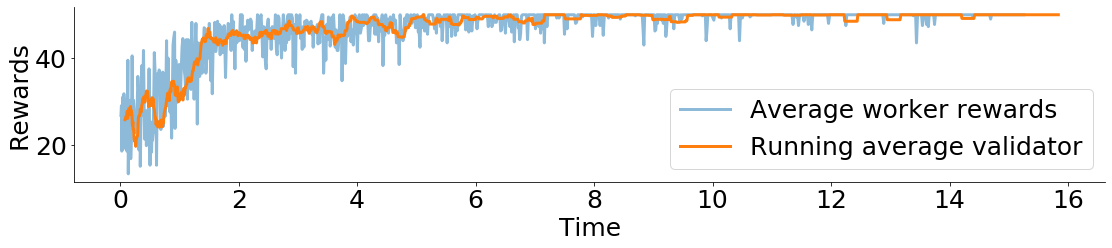

In [3]:
cartpole = a3c.controller.Controller(
    worker=a3c.worker.Worker,
    worker_amount=worker_amount,
    worker_kwargs={
        'environment':'CartPole-v1',
        'entropy':1e-10,
        'episode_limit':1000,
        'rollout_limit':50,
        'rollout_batchsize':-1,
        'discount_rate':1,
        'temporal_difference_scale':0,
        'model':a3c.model.TemporalDifferenceAdvantageActorCritic,
        'model_kwargs':{
            'gpu':gpu,
            'optimizer':torch.optim.Adam,
            'optimizer_parameters':{'lr' : 1e-3},
        },
    },
    validate=validate,
    seed=seed,
    root='logs/cartpole',
)
cartpole(
    status_frequency=2,
    save_model=save_model,
)
cartpole.plot.average(
    window=20,
    save=save_plot,
    show=True,
    font_size=25,
    line_width=3,
)

# **Acrobot environment**

This code creates an A3C which solves the acrobot environment defined in the Open AI gym module. The results produced is used in the report.

Controller running on CPU

Elapsed      | Progress [%]      | Training      | Validation     
__________________________________________________________________
0:00:03      | 2                 | -334.5        | -196.0         
0:00:06      | 7                 | -152.0        | -142.0         
0:00:09      | 15                | -133.5        | -132.0         
0:00:12      | 23                | -107.75       | -102.0         
0:00:15      | 29                | -99.5         | -123.0         
0:00:18      | 36                | -107.0        | -97.0          
0:00:21      | 46                | -88.5         | -132.0         
0:00:24      | 52                | -95.5         | -92.0          
0:00:27      | 59                | -95.25        | -64.0          
0:00:30      | 69                | -147.75       | -95.0          
0:00:33      | 75                | -100.75       | -99.0          
0:00:36      | 85                | -102.5        | -100.0         
0:00:39      | 88                | 

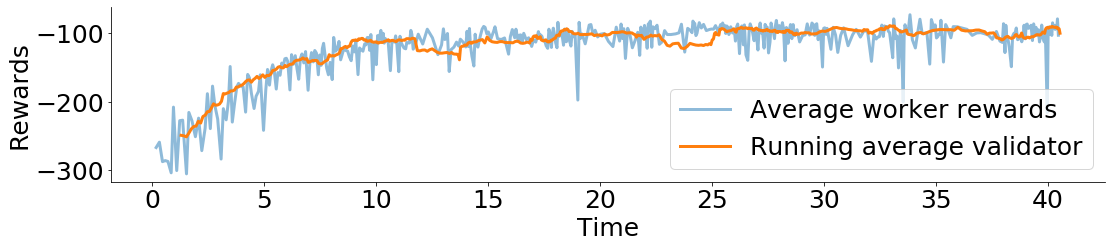

In [4]:
acrobot = a3c.controller.Controller(
    worker=a3c.worker.Worker,
    worker_amount=worker_amount,
    worker_kwargs={
        'environment':'Acrobot-v1',
        'entropy':5e-1,
        'episode_limit':500,
        'rollout_limit':500,
        'rollout_batchsize':-1,
        'discount_rate':0.99,
        'temporal_difference_scale':0,
        'model':a3c.model.TemporalDifferenceAdvantageActorCritic,
        'model_kwargs':{
            'gpu':gpu,
            'optimizer':torch.optim.Adam,
            'optimizer_parameters':{'lr' : 1e-3},
        },
    },
    validate=validate,
    seed=seed,
    root='logs/acrobot',
)
acrobot(
    status_frequency=3,
    save_model=save_model,
)
acrobot.plot.average(
    window=20,
    save=save_plot,
    show=True,
    font_size=25,
    line_width=3,
)

# **Mountaincar environment**

This code creates an A3C which solves the mountaincar environment defined in the Open AI gym module. It was possible to derive a solution for the environment, but afterwards difficult to reproduce the result. This might be due to problems with the seeding, and hereby controlling the randomization of the different modules. The result produced here shows that the code works, but the results in the report are based on a previously iteration which we could not manage to reproduce.

In [ ]:
mountaincar = a3c.controller.Controller(
    worker=a3c.worker.Worker,
    worker_amount=worker_amount,
    worker_kwargs={
        'environment':'MountainCar-v0',
        'entropy':5e-1,
        'episode_limit':1000,
        'rollout_limit':3000,
        'rollout_batchsize':-1,
        'discount_rate':1,
        'temporal_difference_scale':0,
        'model':a3c.model.TemporalDifferenceAdvantageActorCritic,
        'model_kwargs':{
            'gpu':gpu,
            'optimizer':torch.optim.Adam,
            'optimizer_parameters':{'lr' : 5e-5},
        },
    },
    validate=validate,
    seed=seed,
    root='logs/mountaincar',
)
mountaincar(
    status_frequency=15,
    save_model=save_model,
)
mountaincar.plot.average(
    window=20,
    save=save_plot,
    show=True,
    font_size=25,
    line_width=3,
)

Controller running on CPU

Elapsed      | Progress [%]      | Training      | Validation     
__________________________________________________________________
0:00:15      | 1                 | -3000.0       | -3000.0        
0:00:30      | 2                 | -3000.0       | -3000.0        
0:00:45      | 4                 | -3000.0       | -3000.0        
0:01:00      | 5                 | -3000.0       | -3000.0        
0:01:15      | 7                 | -3000.0       | -3000.0        
0:01:30      | 9                 | -3000.0       | -3000.0        
0:01:45      | 10                | -3000.0       | -3000.0        
0:02:00      | 12                | -3000.0       | -3000.0        
0:02:15      | 13                | -3000.0       | -3000.0        
0:02:30      | 14                | -3000.0       | -3000.0        
0:02:45      | 16                | -3000.0       | -3000.0        
0:03:00      | 17                | -3000.0       | -3000.0        
0:03:15      | 18                | 